In [37]:
from PIL import Image, ImageChops
import random
import numpy as np

In [68]:
inputImg = Image.open("test1.bmp").convert('1')
img = Image.open("test1.bmp").convert('1')

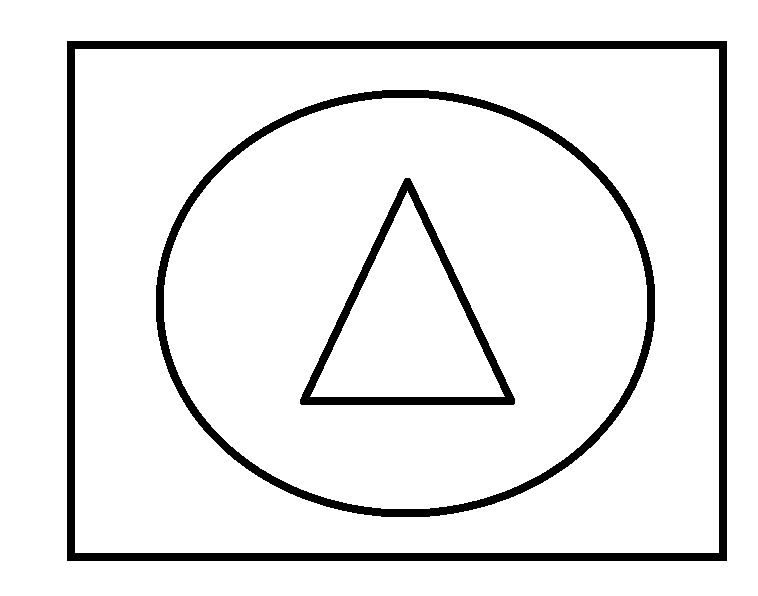

In [69]:
img

In [40]:
def perOfNoise(img1,img2):
    pixels1 = img1.load()
    pixels2 = img2.load()
    diffPix = 0
    for i in range(img1.size[0]): 
        for j in range(img1.size[1]):
            if (pixels1[i,j]!=pixels2[i,j]):
                diffPix += 1
    return diffPix/(img1.size[0]*img1.size[1])*100

In [41]:
def myNoise(pixels,prob):
    for i in range(img.size[0]): 
        for j in range(img.size[1]):
            rdn = random.random()
            if rdn < prob:
                pixels[i,j] = 0
            elif rdn > (1 - prob):
                pixels[i,j] = 255

In [42]:
def myNoisePer(pixels,per):
    countOfPixels = int(img.size[0]*img.size[1]/100*per)
    for _ in range(countOfPixels):
        i = random.randint(0,img.size[0]-1)
        j = random.randint(0,img.size[1]-1)
        if pixels[i,j] == 255:
            pixels[i,j] = 0
        else:
            pixels[i,j] = 255

In [43]:
myNoise(img.load(),0.05)

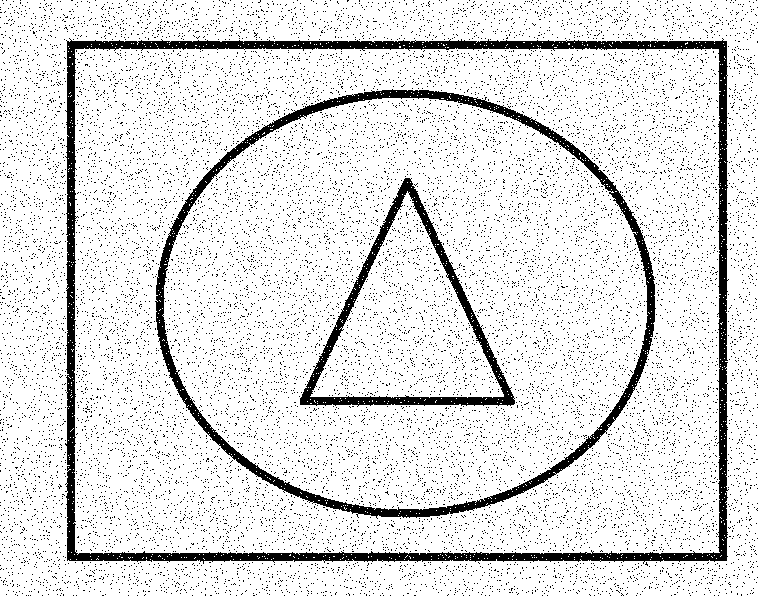

In [44]:
img

In [45]:
perOfNoise(img,inputImg)

5.008544208531813

In [46]:
def erode(mask,frame):
    frameFit = set()
    for i in range(mask.size):
        if (mask[i]==1):
            frameFit.add(frame[i])
    frameFit = list(frameFit)
    if len(frameFit) == 1 and frameFit[0] == 255:
        return 255
    else: 
        return 0   

In [47]:
def dilate(mask,frame):
    frameFit = set()
    for i in range(mask.size):
        if (mask[i]==1):
            frameFit.add(frame[i])
    frameFit = list(frameFit)
    if len(frameFit) == 1 and frameFit[0] == 0:
        return 0
    else: 
        return 255   

In [48]:
def table(mask,frame,centre):  
    frameFit = set()
    for i in range(mask.size):
        if mask[i]==1 and i != centre:
            frameFit.add(frame[i])
    frameFit = list(frameFit)
    if len(frameFit) == 1:
        if frameFit[0] == 255:
            return 255
        else:
            return 0
    else: 
        return frame[centre] 

In [49]:
def myFilter(img,mask,mode):
    pixels = img.load()
    
    newImage = Image.new('1', (img.size[0],img.size[1]), color=255)
    newImagePixels = newImage.load()

    ijStart = mask.shape[0] // 2
    iEnd = img.size[0]-ijStart
    jEnd = img.size[1]-ijStart
    
    mask = mask.flatten()
    centre = mask.size // 2
    
    if (mode == 'erode'):
        for j in range(ijStart,jEnd):
            for i in range(ijStart,iEnd):
                frame = []
                for jFrame in range(j-ijStart,j+ijStart+1):
                    for iFrame in range(i-ijStart,i+ijStart+1): 
                        frame.append(pixels[iFrame,jFrame])
                newImagePixels[i,j] = erode(mask,frame)
    elif (mode == 'dilate'):
        for j in range(ijStart,jEnd):       
            for i in range(ijStart,iEnd):
                frame = []
                for jFrame in range(j-ijStart,j+ijStart+1):
                     for iFrame in range(i-ijStart,i+ijStart+1): 
                        frame.append(pixels[iFrame,jFrame])
                newImagePixels[i,j] = dilate(mask,frame)
    else:
        for j in range(ijStart,jEnd):       
            for i in range(ijStart,iEnd):
                frame = []
                for jFrame in range(j-ijStart,j+ijStart+1):
                     for iFrame in range(i-ijStart,i+ijStart+1): 
                        frame.append(pixels[iFrame,jFrame])
                newImagePixels[i,j] = table(mask,frame,centre)
            
    return newImage

In [50]:
def opening(img, kernel):
    return myFilter(myFilter(img,kernel,'erode'),kernel,'dilate')

def closing(img, kernel):
    return myFilter(myFilter(img,kernel,'dilate'),kernel,'erode') 

In [51]:
def contour(img, mask, inner=True):
    if inner:
        return ImageChops.logical_xor(img, myFilter(img,kernel,'erode'))
    else:
        return ImageChops.logical_xor(img, myFilter(img,kernel,'dilate'))

In [72]:
#kernel = np.array([[0,0,1,0,0],[0,0,1,0,0],[1,1,1,1,1],[0,0,1,0,0],[0,0,1,0,0]])
#kernel = np.array([[0,1,0],[1,1,1],[0,1,0]])
kernel = np.array([[0,0,0],[1,1,1],[0,0,0]])
#kernel = np.array([[0,1,0],[1,1,1],[0,1,0]])

In [53]:
imgTable = myFilter(img,kernel,'ero12de')

In [54]:
perOfNoise(imgTable,inputImg)

1.0857342706876094

In [55]:
imgOpening = opening(img,kernel)
imgOpening
perOfNoise(imgOpening,inputImg)

5.366471286146872

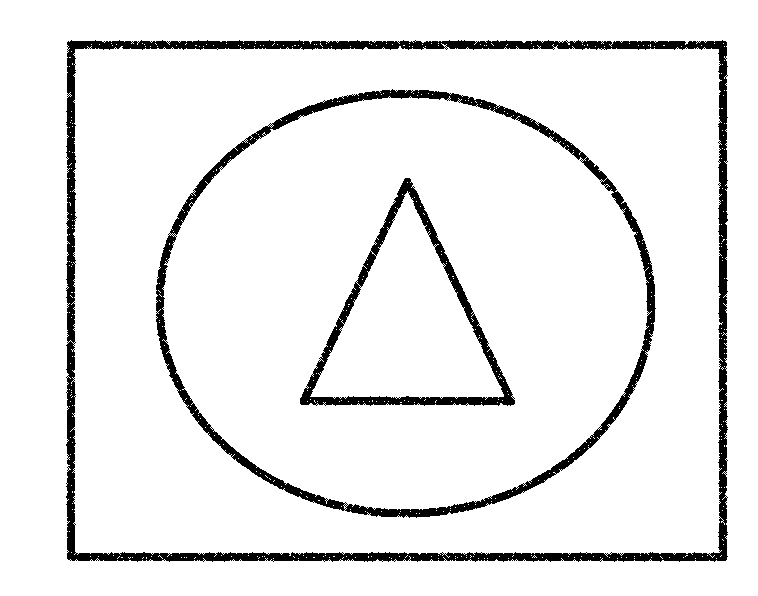

In [57]:
closing(img,kernel)

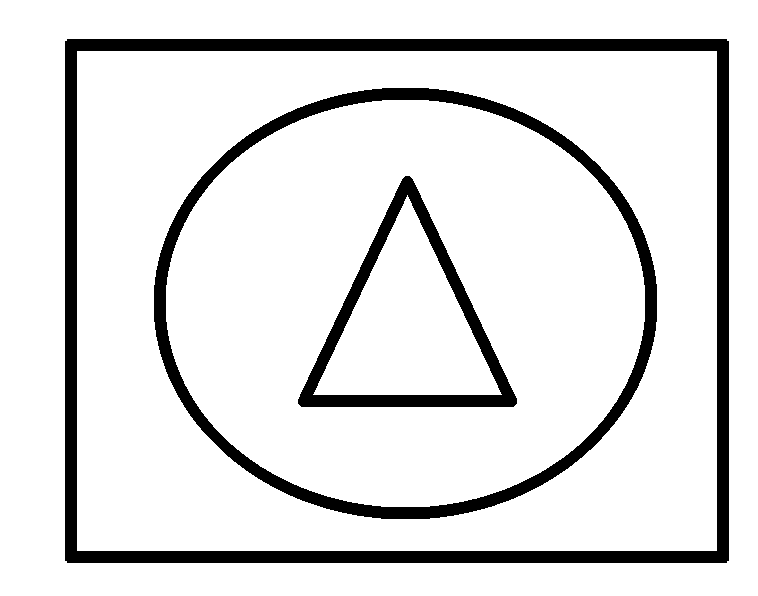

In [414]:
myFilter(closing(img,kernel),kernel,'erodef')

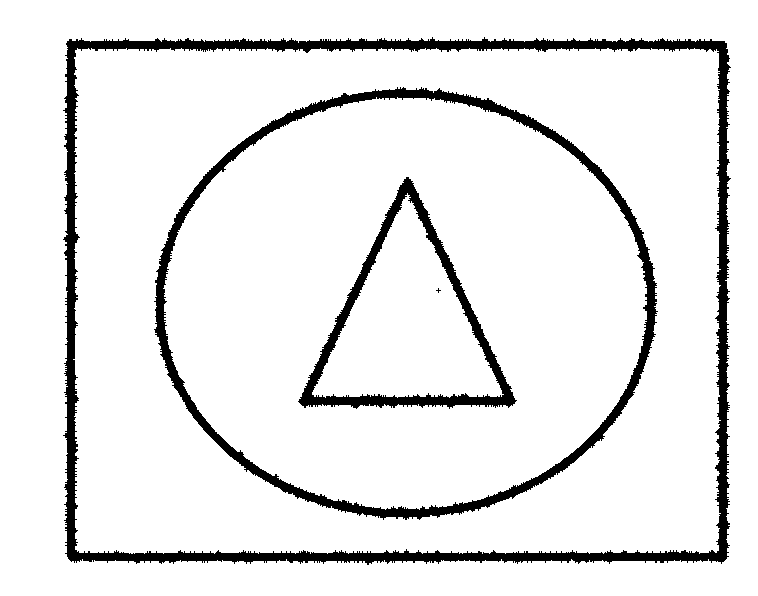

In [411]:
closing(opening(closing(img,kernel),kernel),kernel)

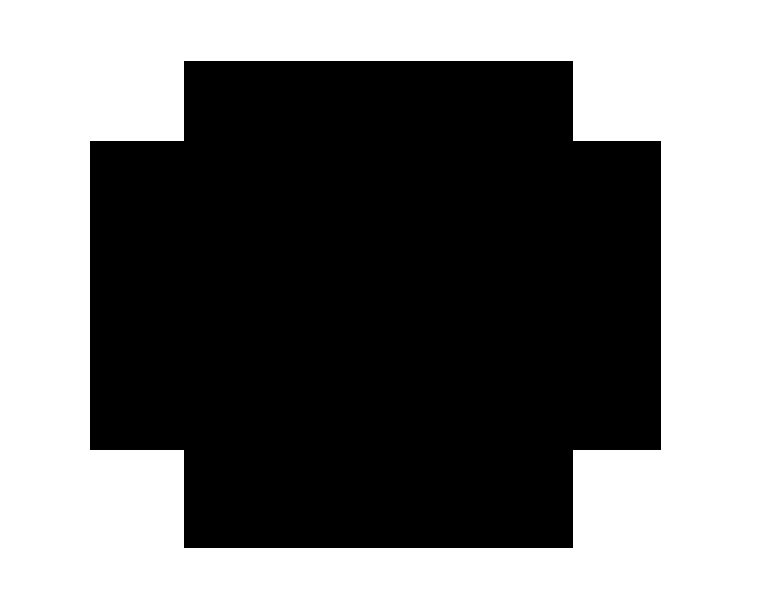

In [35]:
circle = Image.open("круг.bmp").convert('1')
circle2 = Image.open("круг2.bmp").convert('1')
fig = Image.open("фигура.bmp").convert('1')
fig

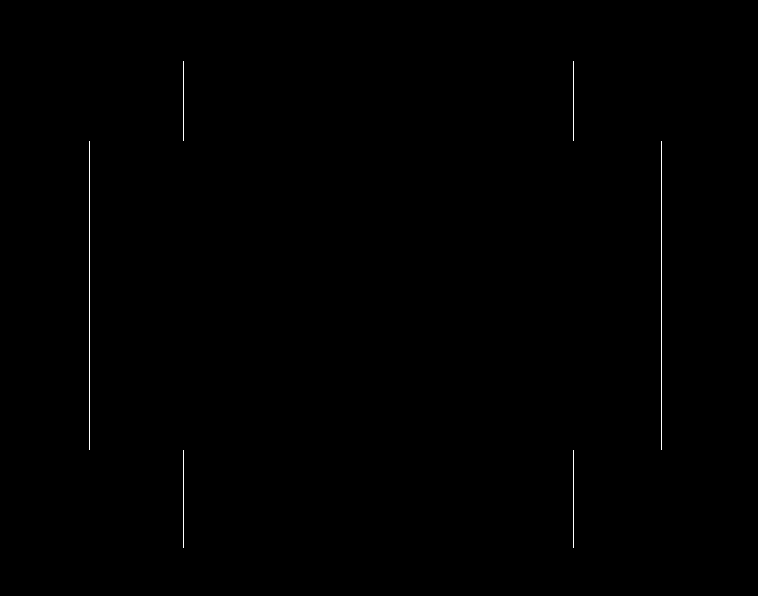

In [73]:
contour(fig,kernel)

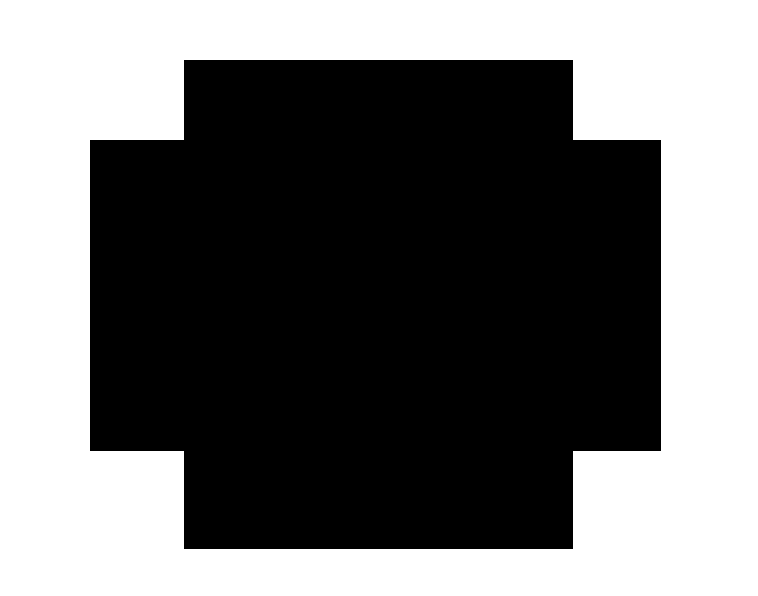

In [64]:
myFilter(fig,kernel,'erode')

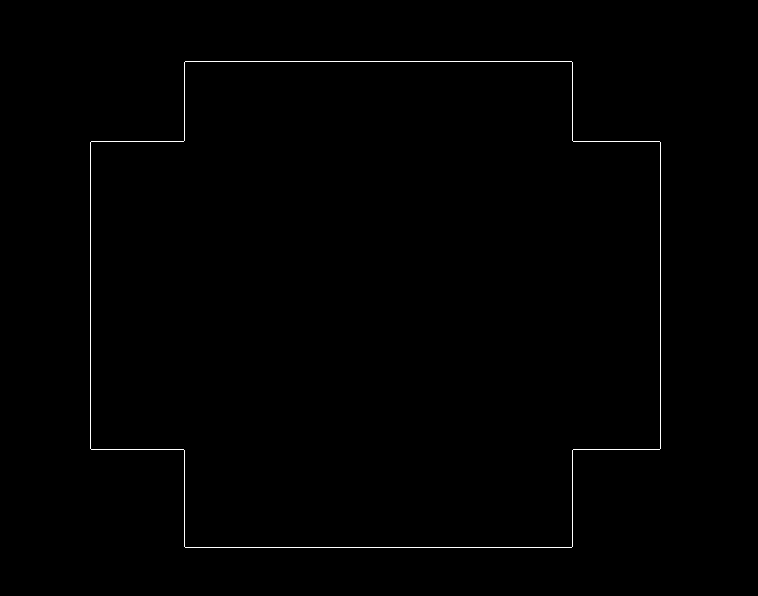

In [67]:
contour(fig,kernel,inner=True)

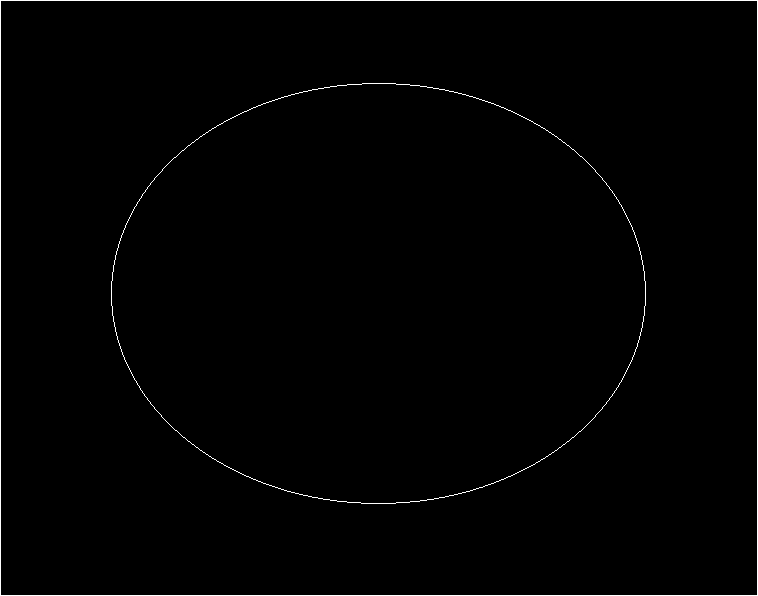

In [82]:
contour(circle2,kernel)